In [1]:
                                                                                                                                                                                                        import pandas as pd
import datetime as dt
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


In [2]:
df_Campaign=pd.read_csv('./Campaign_Data.csv')


In [3]:
df_Campaign.head()

,CustID,status,Campaign_Exec_Date,Campaign_Channel
0,11111J11RREFG1VoGo1FejtGEVV88JtM,viewed,2019-05-28,Email
1,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-29,Email
2,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-30,Email
3,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-03,Email
4,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-04,Email


In [4]:
df_delivery=pd.read_csv('./Customer_Delivery_Data.csv')

In [5]:
df_delivery.head()

,orderdate,articletype,originalreqdeliverydate,currentstatus,currentstatustimestamp,sale_timestamp,readytopick_timestamp,readytoship_timestamp,packed_timestamp,connecttocarrier_timestamp,...,outfordelivery_timestamp,delivered_timestamp,articlename,merchcategorydescription,merchclassdescription,merchgroupdescription,itemdesc,shiptozipcode,shiptocity,shiptostate
0,15/11/22,ZPLU,21/11/22 0:00,Order Delivered,17/11/22 19:00,15/11/22 18:39,15/11/22 20:53,16/11/22 8:15,16/11/22 8:23,16/11/22 8:24,...,17/11/22 19:00,17/11/22 19:00,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,Tablets & Detachables - D,Tablets & Detachables,Computers Peripherals,Lenovo 10.3 Tab X606V 2ndG 4+128GB Grey,226010.0,LUCKNOW,Uttar Pradesh
1,16/11/22,ZPLU,16/11/22 0:00,Order Delivered,19/11/22 13:28,16/11/22 17:30,16/11/22 18:25,16/11/22 19:34,16/11/22 20:51,16/11/22 20:51,...,19/11/22 11:44,19/11/22 13:28,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,Refrigerator Frost Free <300L,Refrigerators,Large Appliances,SAMSUNG FF 253L RT28T3042S8/NL EL INX 2S,389350.0,HALOL,Gujarat
2,16/11/22,ZPLU,16/11/22 0:00,Order Delivered,21/11/22 17:34,16/11/22 17:59,16/11/22 19:51,16/11/22 23:41,17/11/22 1:54,17/11/22 1:54,...,21/11/22 13:13,21/11/22 17:34,BOAT 2.1Ch Soundbar Aavante 1550 RTL,Sound Bars_H,Home Theatre,Entertainment,BOAT 2.1Ch Soundbar Aavante 1550 RTL,493221.0,RAIPUR,Chhattisgarh
3,16/11/22,ZPLU,16/11/22 0:00,Order Delivered,18/11/22 15:24,16/11/22 22:22,17/11/22 2:22,17/11/22 3:40,17/11/22 5:10,17/11/22 5:10,...,18/11/22 12:53,18/11/22 15:24,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,250001.0,MEERUT,Uttar Pradesh
4,16/11/22,ZPLU,16/11/22 0:00,Order Delivered,17/11/22 18:36,16/11/22 22:14,16/11/22 23:20,16/11/22 23:45,17/11/22 7:48,17/11/22 7:48,...,17/11/22 8:58,17/11/22 18:36,Croma LedFHD OA 40in 1Y CREL040FOF024601,"LED Panels 40""",TV LCD,Entertainment,E-Croma LedFHD OA40in1Y CREL040FOF024601,711102.0,HOWRAH,West Bengal


In [6]:
df_Customer=pd.read_csv('./Customer_Master_Data.csv')

/var/folders/0m/4fnz6m4n3lb29mkycr_3kcf00000gn/T/ipykernel_8746/325263824.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Customer=pd.read_csv('./Customer_Master_Data.csv')


In [7]:
df_Customer.head()

,CustID,Gender,Marital_Status,Pincode,State
0,7teAttAeH,NaN,NaN,678506.0,Keral
1,7t8tJJHt7,NaN,NaN,770001.0,Odisha
2,787t17tJt,NaN,NaN,245101.0,Uttar Pradesh
3,787ttJtHH,NaN,NaN,673008.0,Keral
4,7878HHoHo,NaN,NaN,501510.0,Telangana


In [9]:
df_Transact=pd.read_csv('./Customer_Transaction_Data.csv')

In [10]:
df_Transact.head()

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,-25398.00,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,-193703.10,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.98,1,2019-01-01,NaN,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
3,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Wireless Earphones ITFIT Freebie Red,Wireless Earphones ITFIT Freebie Red,Free Gifts,Miscellaneous,0.00,1,2019-01-01,NaN,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001
4,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,-1120.98,-1,2019-01-01,NaN,RS,B&M,8.0,A010,Surat,Gujarat,395007


In [ ]:
# We have to find the campaign date and the orderdate after that campaign
#if there is an orderdate within a month of camp_exec date it is yes(1) if not no(0)

In [11]:
df_Campaign.shape

(10912592, 4)

In [12]:
df_Transact.shape

(1625393, 16)

In [13]:
df_Transact.head(1)

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,ReturnFlag,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,-25398.0,-1,2019-01-01,NaN,RS,B&M,83.0,A129,Pune,Maharashtra,411014


In [14]:
df_merged1=pd.merge(df_Campaign,df_Transact[['CustID','OrderDate']],on='CustID',how='inner')


In [15]:
df_merged2=pd.merge(df_merged1,df_Customer,on='CustID',how='inner')

In [16]:
df_merged2.shape

(28086371, 9)

In [17]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28086371 entries, 0 to 28086370
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   CustID              object
 1   status              object
 2   Campaign_Exec_Date  object
 3   Campaign_Channel    object
 4   OrderDate           object
 5   Gender              object
 6   Marital_Status      object
 7   Pincode             object
 8   State               object
dtypes: object(9)
memory usage: 1.9+ GB


In [ ]:
#Convert the date columns to date type

In [18]:
df_merged2['Campaign_Exec_Date']=pd.to_datetime(df_merged2['Campaign_Exec_Date'])
df_merged2['OrderDate']=pd.to_datetime(df_merged2['OrderDate'])

In [19]:
df_merged2['Time_for_first_txn']=df_merged2['OrderDate']-df_merged2['Campaign_Exec_Date']


In [20]:
df_merged2['Time_for_first_txn'].dt.days

0           527
1           527
2           527
3           527
4           528
           ... 
28086366     26
28086367     25
28086368     25
28086369     24
28086370     24
Name: Time_for_first_txn, Length: 28086371, dtype: int64

In [22]:
df_merged2['Outcome']=[0 if x>30 else 1 for x in df_merged2['Time_for_first_txn'].dt.days] #NEED TO REPLACE 30

In [23]:
df_merged2['Outcome'].value_counts()

Outcome
0    22312719
1     5773652
Name: count, dtype: int64

In [24]:
df_viewed=df_merged2[df_merged2.status=='viewed'] #AS ONLY THOSE ARE TO BE CONSIDERED WHERE CUSTOMER VIEWED THE CAMPAIGN

In [25]:
df_viewed['Outcome'].value_counts()

Outcome
0    11042051
1     3332343
Name: count, dtype: int64

In [26]:
len(df_Customer['CustID'].unique())

502121

INDEPENDENT VARS=Campaign_Channel,Gender,Marital_Status,State

TARGET=outcome

In [27]:
df_merged2.columns

Index(['CustID', 'status', 'Campaign_Exec_Date', 'Campaign_Channel',
       'OrderDate', 'Gender', 'Marital_Status', 'Pincode', 'State',
       'Time_for_first_txn', 'Outcome'],
      dtype='object')

In [28]:
X = df_merged2[['status','Campaign_Channel', 'Gender', 'Marital_Status', 'State',]]
Y = df_merged2[['Outcome']]

In [29]:
data = pd.get_dummies(X,columns=['status','Campaign_Channel','Gender', 'Marital_Status', 'State'])
data.columns

Index(['status_click', 'status_clicked', 'status_delivered', 'status_viewed',
       'Campaign_Channel_Email', 'Campaign_Channel_SMS', 'Gender_Female',
       'Gender_Male', 'Gender_Transgender', 'Marital_Status_Married',
       'Marital_Status_Unmarried', 'State_Andaman & Nicobar',
       'State_Andhra Pradesh', 'State_Arunachal Pradesh', 'State_Assam',
       'State_Bihar', 'State_Chhatisgarh', 'State_Delhi', 'State_Diu & Daman',
       'State_Goa', 'State_Gujarat', 'State_Gurugram', 'State_Haryana',
       'State_Himachal Pradesh', 'State_Jammu & Kashmir',
       'State_Jammu And Kashmir', 'State_Jharkhand', 'State_Karnataka',
       'State_Keral', 'State_Leh Ladhak', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Manipur', 'State_Meghalaya',
       'State_Mizoram', 'State_Nagaland', 'State_Odisha', 'State_Pondicherry',
       'State_Punjab', 'State_Rajasthan', 'State_Sikkim', 'State_Tamil Nadu',
       'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh',
       'S

In [30]:
X = data

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22469096, 47)
(5617275, 47)
(22469096, 1)
(5617275, 1)


In [33]:
model = xgb.XGBClassifier()

In [34]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
v = model.predict(X_test)

In [36]:
pd.DataFrame(v).value_counts()

0    5475333
1     141942
Name: count, dtype: int64

In [37]:
Precision = metrics.precision_score(y_test,v)
print("Precision is :", Precision)

Precision is : 0.5499288441757901


In [38]:
accuracy = metrics.accuracy_score(y_test,v)
print("accuracy is:", accuracy)

accuracy is: 0.7969871512432629


In [39]:
recall = metrics.recall_score(y_test,v)
print("recall is : ", recall)

recall is :  0.06760884948547187


In [40]:
XGB_Confusion_Matrix = metrics.confusion_matrix(y_test,v)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(XGB_Confusion_Matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

# RandomForest Model

In [63]:
#20% of data taken from actual dataset
df_reduced = df_merged2.sample(frac=0.05, random_state=42)

In [52]:
df_reduced.columns

Index(['CustID', 'status', 'Campaign_Exec_Date', 'Campaign_Channel',
       'OrderDate', 'Gender', 'Marital_Status', 'Pincode', 'State',
       'Time_for_first_txn', 'Outcome'],
      dtype='object')

In [64]:
X1 = df_reduced[['status','Campaign_Channel', 'Gender', 'Marital_Status', 'State',]]
Y1 = df_reduced[['Outcome']]

In [65]:
data1 = pd.get_dummies(X1,columns=['status','Campaign_Channel','Gender', 'Marital_Status', 'State'])
data1.columns

Index(['status_click', 'status_clicked', 'status_delivered', 'status_viewed',
       'Campaign_Channel_Email', 'Campaign_Channel_SMS', 'Gender_Female',
       'Gender_Male', 'Gender_Transgender', 'Marital_Status_Married',
       'Marital_Status_Unmarried', 'State_Andaman & Nicobar',
       'State_Andhra Pradesh', 'State_Arunachal Pradesh', 'State_Assam',
       'State_Bihar', 'State_Chhatisgarh', 'State_Delhi', 'State_Diu & Daman',
       'State_Goa', 'State_Gujarat', 'State_Gurugram', 'State_Haryana',
       'State_Himachal Pradesh', 'State_Jammu & Kashmir',
       'State_Jammu And Kashmir', 'State_Jharkhand', 'State_Karnataka',
       'State_Keral', 'State_Leh Ladhak', 'State_Madhya Pradesh',
       'State_Maharashtra', 'State_Manipur', 'State_Meghalaya',
       'State_Mizoram', 'State_Nagaland', 'State_Odisha', 'State_Pondicherry',
       'State_Punjab', 'State_Rajasthan', 'State_Sikkim', 'State_Tamil Nadu',
       'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh',
       'S

In [66]:
X1 = data1

In [67]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.20)

In [68]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(1123455, 47)
(280864, 47)
(1123455, 1)
(280864, 1)


In [69]:
clf = RandomForestClassifier()

In [70]:
%%time
clf.fit(X1_train, y1_train)

/Users/Shared/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


CPU times: user 49.9 s, sys: 1.09 s, total: 51 s
Wall time: 51.3 s


RandomForestClassifier()

In [71]:
y1_pred = clf.predict(X1_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7970441209980631


In [73]:
recall = metrics.recall_score(y1_test,y1_pred)
print("recall is : ", recall)

recall is :  0.06306792465968039


In [74]:
RF_Confusion_Matrix = metrics.confusion_matrix(y1_test,y1_pred)
RF_Confusion_Matrix

array([[220238,   3180],
       [ 53823,   3623]])

In [93]:
# Predict the class probabilities for the positive class
y_prob = clf.predict_proba(X1_test)[:, 1]
print(y_prob.shape)

(280864,)


In [91]:
print(y1_test[:5])
print(y_prob[:5])

          Outcome
3697966         0
9693211         0
24003181        0
1123015         1
21635889        0
[0.13928112 0.02431968 0.13092973 0.17891398 0.04917569]


In [95]:
len(y1_test)

280864

(5617275, 1)

In [102]:
#Ks_Statistics for RandomForest Model
df = pd.DataFrame()
df['real'] = y1_test
df['proba'] = y_prob

class0 = df[df['real'] == 0]
class1 = df[df['real'] == 1]
ks = ks_2samp(class0['proba'], class1['proba'])

print(f'ks-statistic for the model is :{ks.statistic}')
#ks_statistic, p_value = ks_2samp(y_prob[y1_test == 1], y_prob[y1_test == 0])

ks-statistic for the model is :0.25548913532468814


In [77]:
#ROC area of RandomForest Model

roc_auc = roc_auc_score(y1_test, y_prob)
print(f'ROC Area (AUC): {roc_auc}')

ROC Area (AUC): 0.6802924716279537


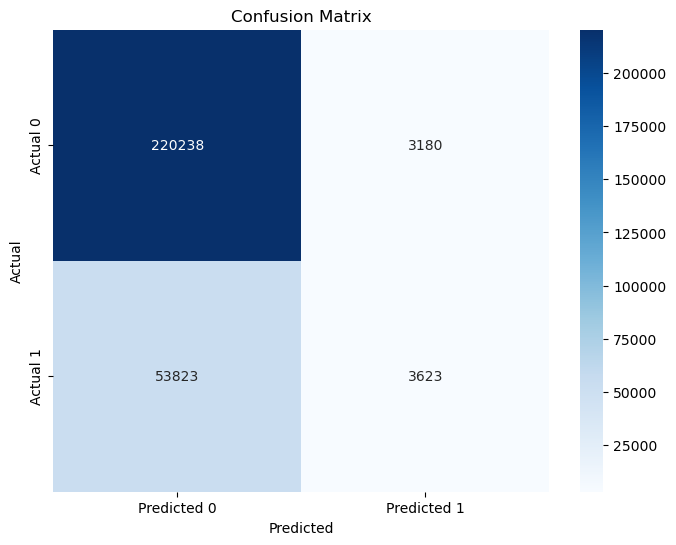

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(RF_Confusion_Matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

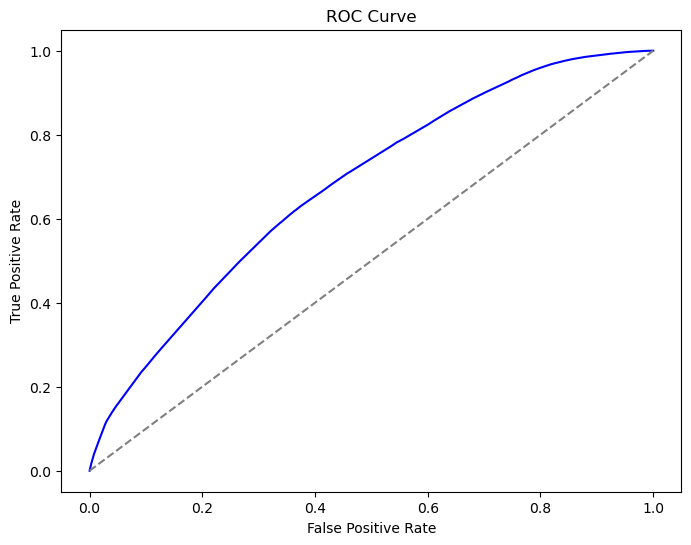

In [105]:
fpr, tpr, thresholds = roc_curve(y1_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


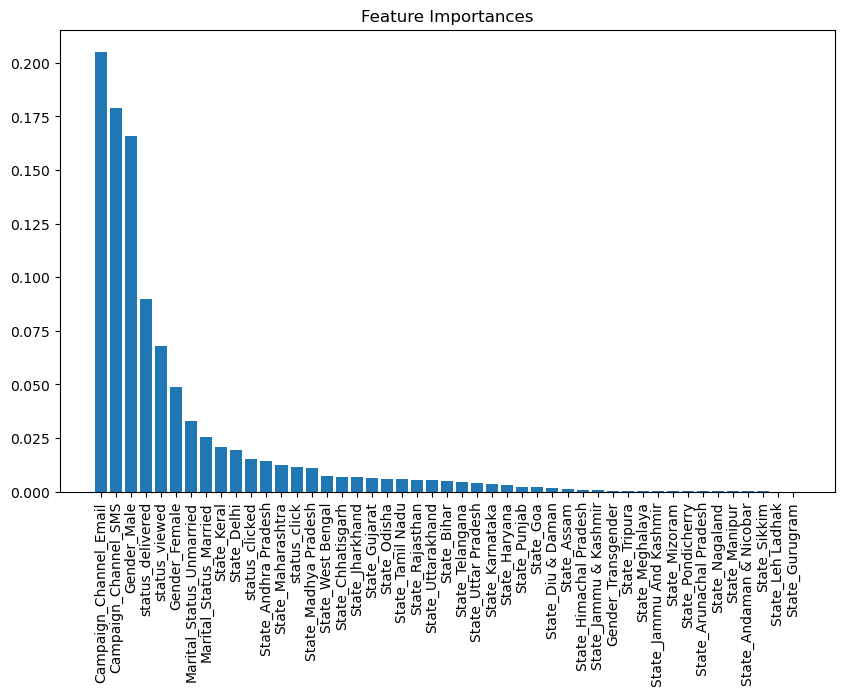

In [106]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X1_train.shape[1]), importances[indices])
plt.xticks(range(X1_train.shape[1]), X1_train.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

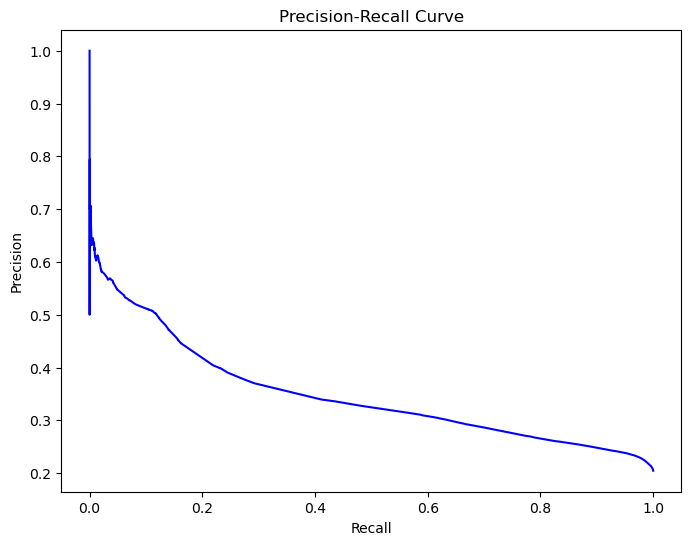

In [107]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y1_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [110]:
model_names = ['xgBoost', 'Random Forest']
auc_scores = [0.79, 0.78]

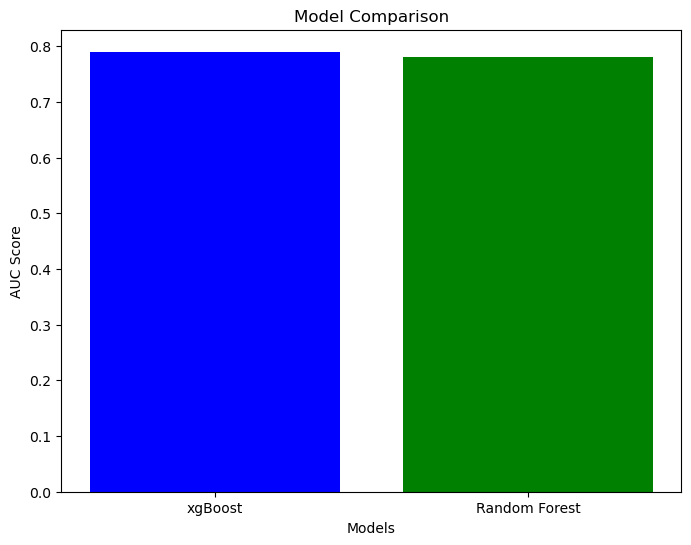

In [112]:
# Create a bar chart to compare model AUC scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, auc_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Model Comparison')
plt.show()